# Evaluating Minkowski Graph Embeddings<br>

We now attempt to apply this DAG embedding algorithm on real data, beginning with a few synthetic datasets: causal set graphs, uniformly scattered interval graphs, and Random DAGs. <br>

Finally, we apply the embedding to real world citation networks, such as the collection of directed citations existing between published scientific papers (from KDD 2003 data), as well as the network of citations documented between legal cases in the Supreme Court of the United States **[1]**<br>
<br>
**[1]** source: The Authority of Supreme Court Precedent James H. Fowler, Sangick Jeon Social Networks 30 (1): 16-30 (January 2008)

In [39]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
# plotting style
%matplotlib inline
plt.style.use('seaborn')
# display multiple outputs within a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all";
# ignore warnings
import warnings
warnings.filterwarnings('ignore');

### Visualizing causal sets & synthetic DAGs in Minkowski space

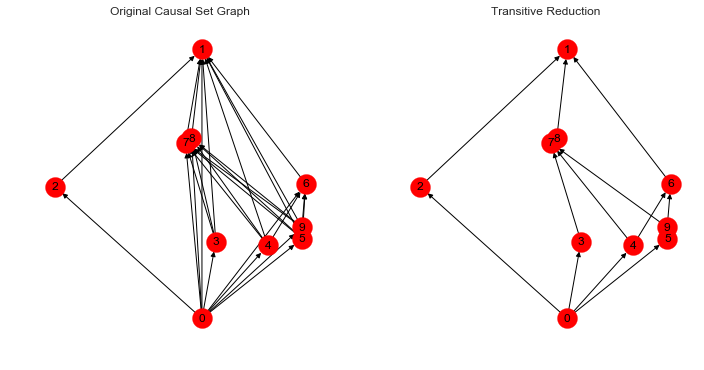

In [40]:
from sample_graphs import causal_set_graph, uniform_box_graph
from eval_metrics import add_edges, roc_auc_score, plot_roc_curve, sensitivity, specificity
from dag_embed import MinkowskiEmbedding

# plot causal set graph & transitive reduction
N = 10
G = causal_set_graph(N, 2)
options = {'node_size': 400,
           'width': 1,
           'with_labels': True}
draw_pos = {i:G.node[i]['position'][::-1] for i in range(N)}
trans_G = nx.transitive_reduction(G)
plt.figure(figsize=(12, 6))
plt.subplot(121)
nx.draw(G, pos=draw_pos, **options)
plt.title('Original Causal Set Graph')
plt.subplot(122)
plt.title('Transitive Reduction')
nx.draw(trans_G, pos=draw_pos, **options);

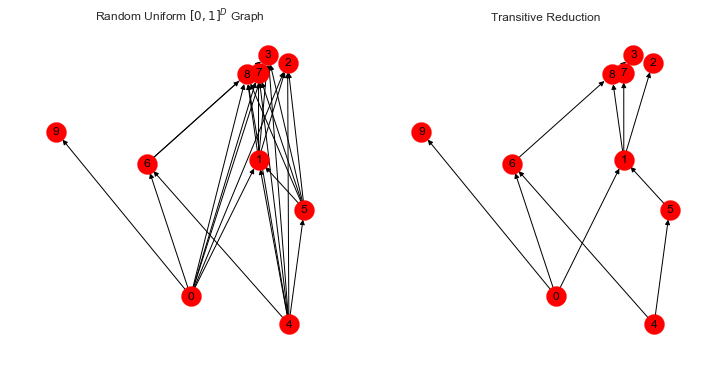

In [41]:
# plot uniform rectangle graph and transitive reduction
N = 10
G = uniform_box_graph(N, 2)
draw_pos = {i:G.node[i]['position'][::-1] for i in range(N)}
trans_G = nx.transitive_reduction(G)
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.title(r'Random Uniform $[0,1]^D$ Graph')
nx.draw(G, pos=draw_pos, **options)
plt.subplot(122)
plt.title('Transitive Reduction')
nx.draw(trans_G, pos=draw_pos, **options);

## Ex.) Minkowski Embedding with causal set graphs

Note: how to handle embeddings where time direction is reversed?

In [57]:
plt.style.use('default')
def plot_embedding(G, title = 'Original input graph'):
    # fit embedding and plot in 2-D Minkowski space
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    N = X.shape[0]
    plt.figure(figsize=(12,5))
    plt.subplot(121)
    plt.title('Spacetime Embedding Recreation')
    plt.xlabel('Time')
    plt.ylabel('Space')
    plt.scatter(X[:, 0], X[:, 1], s=100)
    # add node labels
    for i in range(N):
        _ = plt.text(X[i, 0], X[i, 1], str(i), size=14);
    # add edges to the plot
    for u,v in add_edges(X):
        _ = plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], c='black', linestyle='--', alpha=0.3);
    plt.subplot(122)
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Space')
    X_orig = np.array([G.node[i]['position'] for i in range(N)])
    # plot original coordinates and edges from input graph (i.e. if input G = causal set) 
    plt.scatter(X_orig[:, 0], X_orig[:, 1], s=100)
    for i in range(N):
        _ = plt.text(X_orig[i, 0], X_orig[i, 1], str(i), size=14);
    for u,v in list(G.edges()):
        _ = plt.plot([X_orig[u][0], X_orig[v][0]], [X_orig[u][1], X_orig[v][1]], 
                     alpha=0.3, c='black', linestyle='--');
    plt.show();

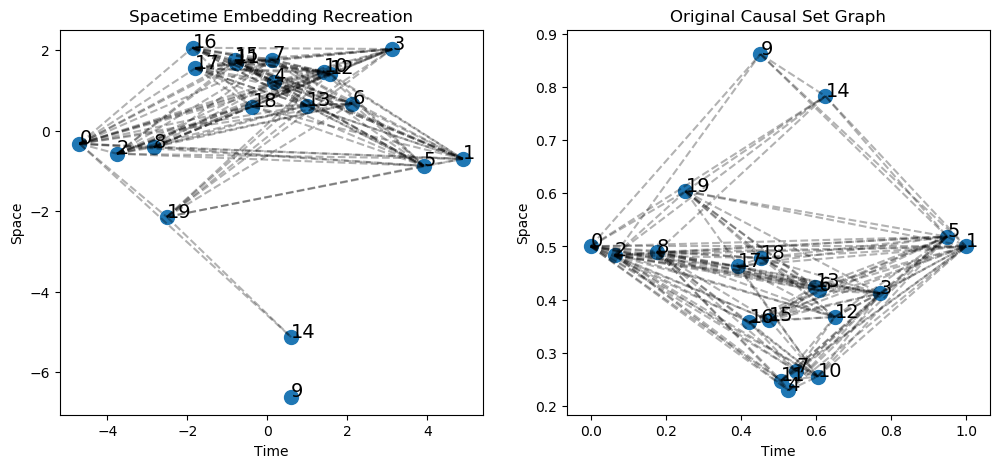

In [65]:
N = 20
G = causal_set_graph(N, 2)
plot_embedding(G, title = 'Original Causal Set Graph')

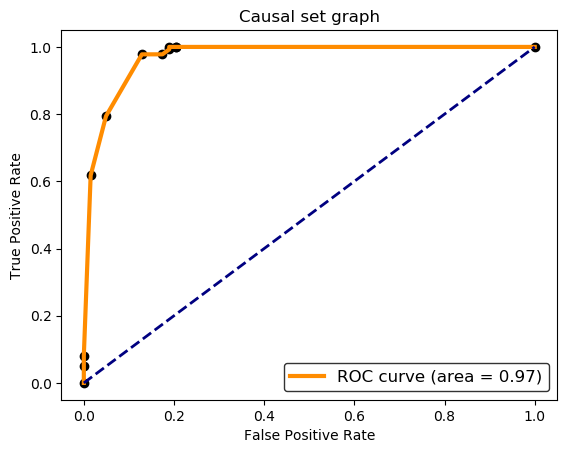

Sensitivity at c=1:  0.7941176470588235
Specificity at c=1:  0.9507575757575758


In [66]:
# evaluate over several random causal set graphs
causal_graph_scores = []
N = 20
for i in range(20):
    G = causal_set_graph(N, 2)
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    causal_graph_scores.append(roc_auc_score(G, X))

# plot roc curve
plot_roc_curve(G, X, title='Causal set graph')
print('Sensitivity at c=1: ', sensitivity(G, embed.predict(G)))
print('Specificity at c=1: ', specificity(G, embed.predict(G)));

## Ex.) Embedding of uniformly scattered interval graph

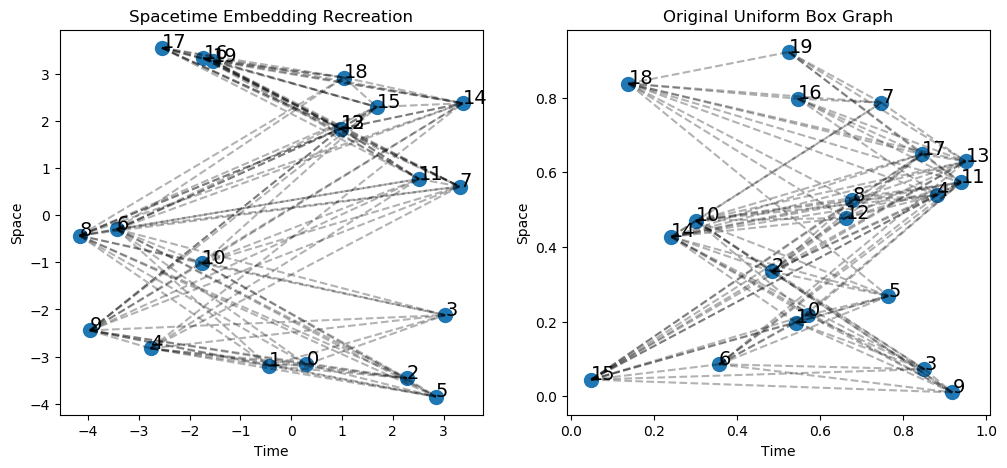

In [67]:
# evaluate on uniform box graph
N = 20
G = uniform_box_graph(N, 2)
plot_embedding(G, title='Original Uniform Box Graph')

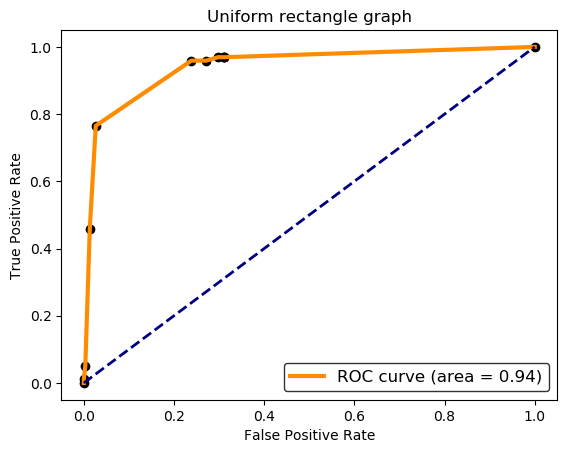

Sensitivity at c=1:  0.7653061224489796
Specificity at c=1:  0.9735099337748344


In [68]:
# evaluate over several sampled uniform box graphs
box_graph_scores = []
N = 20
for i in range(20):
    G = causal_set_graph(N, 2)
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    box_graph_scores.append(roc_auc_score(G, X))

# plot roc curve
plot_roc_curve(G, X, title='Uniform rectangle graph')
print('Sensitivity at c=1: ', sensitivity(G, embed.predict(G)))
print('Specificity at c=1: ', specificity(G, embed.predict(G)));

## Ex.) Minkowski Embedding of Random DAG

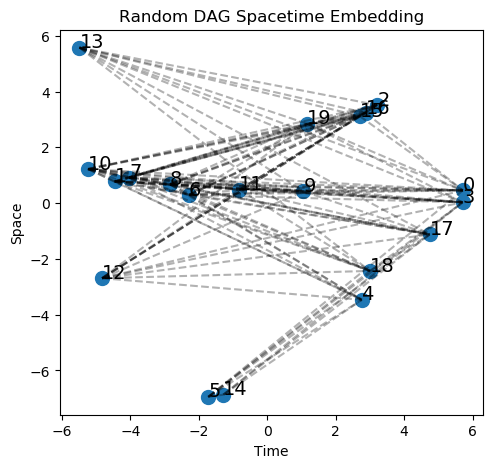

In [77]:
N = 20
G = nx.erdos_renyi_graph(N, p=0.1, seed=None, directed=True)
embed = MinkowskiEmbedding(n_components=2) 
X = embed.fit(G)
plt.figure(figsize=(12,5))
plt.style.use('default')
plt.subplot(121)
plt.title('Random DAG Spacetime Embedding')
plt.xlabel('Time')
plt.ylabel('Space')
plt.scatter(X[:, 0], X[:, 1], s=100)
for i in range(N):
    _ = plt.text(X[i, 0], X[i, 1], str(i), size=14);
for u,v in add_edges(X):
    _ = plt.plot([X[u][0], X[v][0]], [X[u][1], X[v][1]], c='black', linestyle='--', alpha=0.3);
plt.show();

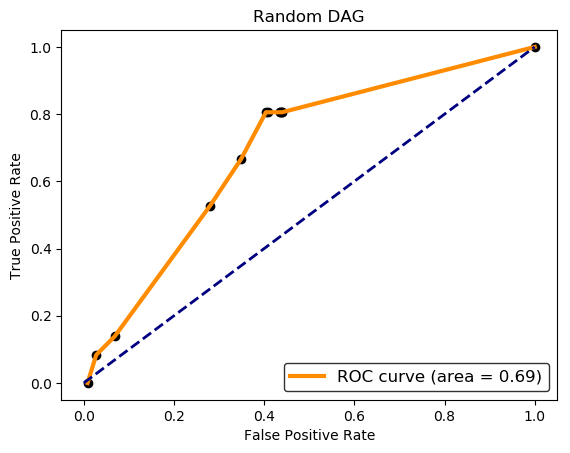

Sensitivity at c=1:  0.6666666666666666
Specificity at c=1:  0.6510989010989011


In [79]:
# evaluate over several random DAGs
random_dag_scores = []
for i in range(20):
    G = nx.erdos_renyi_graph(20, p=0.1, seed=None, directed=True)
    embed = MinkowskiEmbedding(n_components=2) 
    X = embed.fit(G)
    random_dag_scores.append(roc_auc_score(G, X))

# plot roc curve
plot_roc_curve(G, X, title='Random DAG')
print('Sensitivity at c=1: ', sensitivity(G, embed.predict(G)))
print('Specificity at c=1: ', specificity(G, embed.predict(G)));

# Ex.) Citation Networks

**arXiv physics paper citations: `hep-th`**

In [140]:
import pandas as pd
hep_df = pd.read_csv('../data/arxiv_citations/hep-th-citations.tar.gz', compression='gzip', dtype=str)
hep_df = hep_df.dropna()
hep_df['cited_from'] = hep_df['hep-th-citations'].apply(lambda x: str(x).split(' ')[0])
hep_df['cited_to'] = hep_df['hep-th-citations'].apply(lambda x: str(x).split(' ')[1])
hep_df = hep_df.iloc[:, 1:]
hep_df.head()

,cited_from,cited_to
0,0001001,9308122
1,0001001,9309097
2,0001001,9311042
3,0001001,9401139
4,0001001,9404151


In [141]:
slac_dates = pd.read_csv('../data/arxiv_citations/hep-th-slacdates.tar.gz', compression='gzip', dtype=str)
slac_dates = slac_dates.dropna()
slac_dates['arxiv_id'] = slac_dates['hep-th-slacdates'].apply(lambda x: str(x).split(' ')[0])
slac_dates['date'] = slac_dates['hep-th-slacdates'].apply(lambda x: str(x).split(' ')[1])
slac_dates = slac_dates.iloc[:, 1:]
slac_dates.head()
slac_dates.shape

,arxiv_id,date
0,0001002,2000-01-04
1,0001003,2000-01-04
2,0001004,2000-01-04
3,0001005,2000-01-04
4,0001006,2000-01-04


(29554, 2)

In [142]:
import datetime
N = 40
top_cited = list(hep_df.cited_to.value_counts()[:N].index)
edges = []
for node in top_cited:
    cited_by = hep_df.loc[hep_df.cited_to == node, 'cited_from'].values
    for x in cited_by:
        if x in top_cited:
            edges.append((x, node))

degree_dict = dict(zip(hep_df.cited_to.value_counts()[:N].index,
                       hep_df.cited_to.value_counts()[:N].values))
top_cited_df = slac_dates.loc[(slac_dates.arxiv_id.apply(lambda x: x in top_cited)), :]
top_cited_df = top_cited_df.reset_index(drop=True)
top_cited_df['degree'] = top_cited_df.arxiv_id.apply(lambda x: degree_dict[x])
top_cited_df['num_date'] = top_cited_df.date
top_cited_df['date_time'] = top_cited_df.date.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))
top_cited_df['num_date'] = top_cited_df.date_time - np.min(top_cited_df.date_time)
top_cited_df['num_date'] = top_cited_df['num_date'].dt.days
top_cited_df['num_date'] = top_cited_df.num_date / np.max(top_cited_df.num_date)
date_dict = dict(zip(top_cited_df.arxiv_id.values, top_cited_df.num_date))

In [143]:
# build graph and fit embedding
G = nx.DiGraph()
for node in top_cited:
    G.add_node(node)
G.add_edges_from(edges)
embed = MinkowskiEmbedding(n_components=2)
X = embed.fit(G)

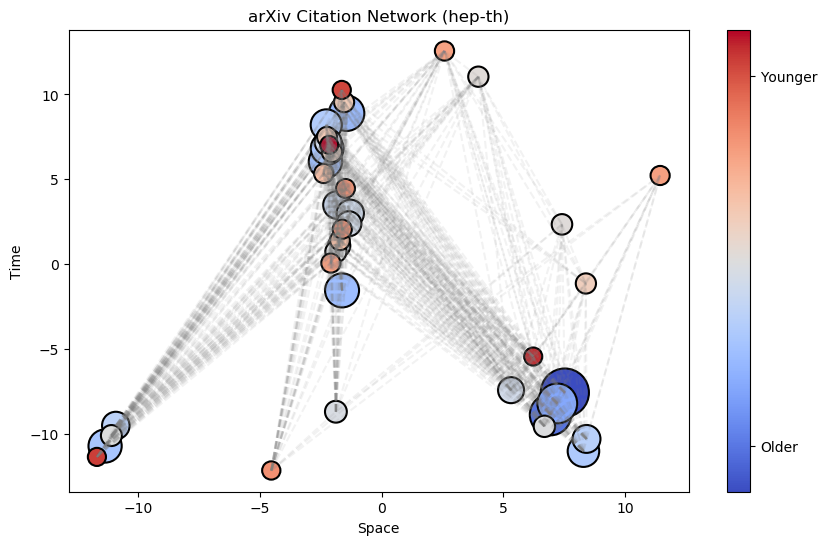

In [144]:
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.grid('off')
plt.title('arXiv Citation Network (hep-th)')
plt.ylabel('Time')
plt.xlabel('Space')
node_list = list(G.nodes())
node_colors = np.array(list(date_dict.values()))
node_sizes = np.array(list(degree_dict.values()))
# switch coords to place timelike coordinate on y-axis
im = plt.scatter(X[:, 1], X[:, 0], s = node_sizes/2, c = node_colors, cmap=plt.cm.coolwarm,
                vmin=0, vmax=1, edgecolor='black', linewidth=1.5)
for u,v in add_edges(X):
    _ = plt.plot([X[u][1], X[v][1]], [X[u][0], X[v][0]], c='gray', linestyle='--', alpha=0.1);
cbar = plt.colorbar(im);
cbar.set_ticks([0.1, 0.9]);
cbar.set_ticklabels(['Older', 'Younger'])
#plt.savefig('hep-th_citation_network.png')
plt.show();

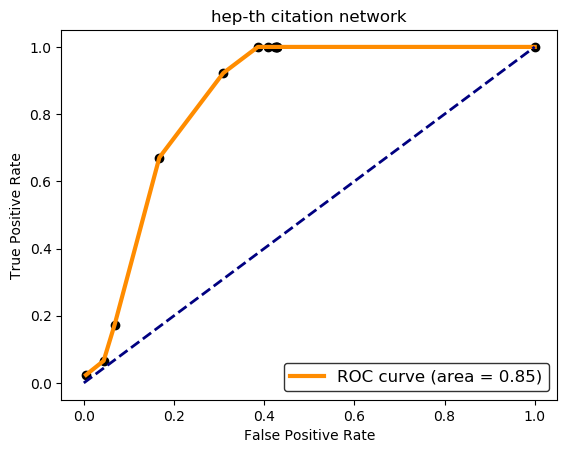

0.9221556886227545

0.6908583391486393

In [145]:
plot_roc_curve(G, X, title='hep-th citation network')
sensitivity(G, embed.predict(G))
specificity(G, embed.predict(G))
hep_th_score = roc_auc_score(G, X)

## SCOTUS Citation Network

In [160]:
scotus_df = pd.read_csv('../data/SCOTUS/allcites.txt', sep = ' ', header = None)
scotus_df.columns = ['cited_by_id', 'cited_id']
scotus_df.head()
scotus_df.shape
judicial_df = pd.read_csv('../data/SCOTUS/judicial.csv')
judicial_df.head()

,cited_by_id,cited_id
0,388,332
1,388,386
2,511,153
3,511,28
4,511,300


(216738, 2)

,caseid,usid,parties,year,overruled,overruling,oxford,liihc,indeg,outdeg,hub,hubrank,auth,authrank,between,incent
0,1,1US1,NaN,1754,0,0,0,0,0,0,0.0,20250,0.000000,20945,0.0,0.000000
1,2,1US2,NaN,1759,0,0,0,0,0,0,0.0,20250,0.000000,20945,0.0,0.000000
2,3,1US3,NaN,1760,0,0,0,0,0,0,0.0,20250,0.000000,20945,0.0,0.000000
3,4,1US4,NaN,1760,0,0,0,0,0,0,0.0,20250,0.000000,20945,0.0,0.000000
4,5,1US5,NaN,1762,0,0,0,0,1,0,0.0,20250,0.000029,15507,0.0,0.038877


In [148]:
# select only top N most cited cases
N = 50
top_cited = list(scotus_df.cited_id.value_counts()[:N].index)
edges = []
for node in top_cited:
    cited_by_id = scotus_df.loc[scotus_df.cited_id == node, 'cited_by_id'].values
    for x in cited_by_id:
        if x in top_cited:
            edges.append((x, node))

degree_dict = dict(zip(scotus_df.cited_id.value_counts()[:N].index,
                       scotus_df.cited_id.value_counts()[:N].values))
top_cited_df = judicial_df.loc[(judicial_df.caseid.apply(lambda x: x in top_cited)), :]
top_cited_df = top_cited_df.reset_index(drop=True)
top_cited_df['degree'] = top_cited_df.caseid.apply(lambda x: degree_dict[x])
top_cited_df['num_date'] = top_cited_df.year - np.min(top_cited_df.year)
#top_cited_df['num_date'] = top_cited_df.num_date / np.max(top_cited_df.num_date)
top_cited_df['num_date'] = (top_cited_df.num_date - np.mean(top_cited_df.num_date)) / np.std(top_cited_df.num_date)
date_dict = dict(zip(top_cited_df.caseid.values, top_cited_df.num_date))
top_cited_df.head()

,caseid,usid,parties,year,overruled,overruling,oxford,liihc,indeg,outdeg,hub,hubrank,auth,authrank,between,incent,degree,num_date
0,1016,17US316,McCulloch v. Maryland,1819,0,0,1,1,198,0,0.000000,20250,0.029660,188,0.000000,0.171621,196,-3.256212
1,1156,22US1,Gibbons v. Ogden,1824,0,0,1,1,156,0,0.000000,20250,0.014221,582,0.000000,0.164436,156,-3.119051
2,1195,22US738,"Osborn v. President, Directors & Co. of Bank",1824,7907,0,1,0,112,0,0.000000,20250,0.005356,1647,0.000000,0.159238,112,-3.119051
3,7417,116US616,Boyd v. United States,1886,0,0,1,0,130,1,0.000004,18427,0.043477,103,0.000013,0.142113,130,-1.418249
4,10465,166US226,"Chicago, B. & Q. R. Co. v. Chicago",1897,0,0,1,0,112,32,0.002909,3124,0.026381,236,0.001208,0.145005,112,-1.116494


In [149]:
# build input graph and fit the embedding
G = nx.DiGraph()
for node in top_cited:
    G.add_node(node)
G.add_edges_from(edges)
embed = MinkowskiEmbedding(n_components=2)
X = embed.fit(G)

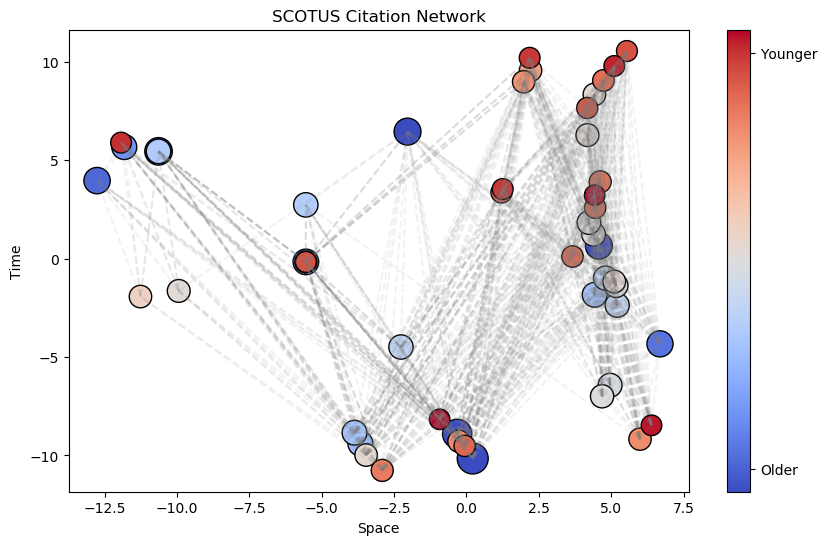

In [150]:
plt.style.use('default')
plt.figure(figsize=(10,6))
plt.grid('off')
plt.title('SCOTUS Citation Network')
plt.ylabel('Time')
plt.xlabel('Space')
node_list = list(G.nodes())
node_colors = np.array(list(date_dict.values()))
node_sizes = np.array(list(degree_dict.values()))
im = plt.scatter(X[:, 1], X[:, 0], s = 2*node_sizes, c = node_colors, cmap=plt.cm.coolwarm,
                vmin=-1, vmax=1, edgecolor='black', linewidth=1)
for u,v in add_edges(X):
    _ = plt.plot([X[u][1], X[v][1]], [X[u][0], X[v][0]], c='gray', linestyle='--', alpha=0.1);
cbar = plt.colorbar(im);
cbar.set_ticks([-0.9, 0.9]);
cbar.set_ticklabels(['Older', 'Younger'])
plt.savefig('SCOTUS_citation_network.png')
plt.show();

0.9130434782608695

0.7507481829841812

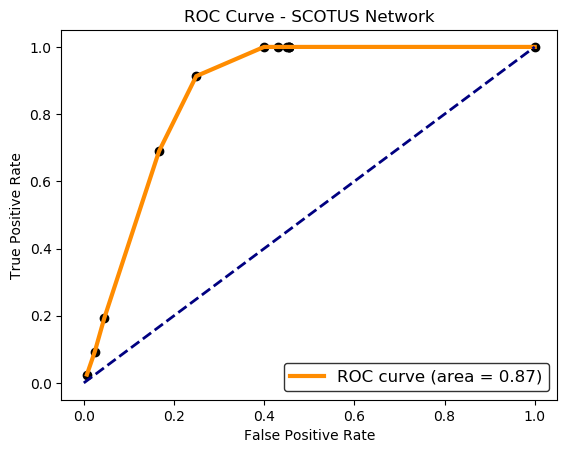

In [151]:
sensitivity(G, embed.predict(G))
specificity(G, embed.predict(G))
plot_roc_curve(G, X, title='ROC Curve - SCOTUS Network')
scotus_score = roc_auc_score(G, X)

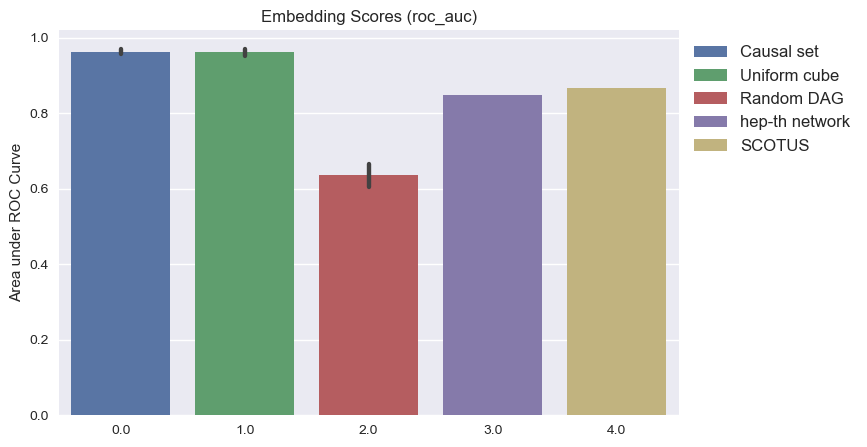

In [159]:
cite_scores = pd.DataFrame([[3, hep_th_score],[4, scotus_score]], columns=['dataset', 'roc_auc'])
test_data = list(np.repeat(0, len(causal_graph_scores)))
test_data += list(np.repeat(1, len(box_graph_scores)))
test_data += list(np.repeat(2, len(random_dag_scores)))
test_scores = list(causal_graph_scores) + list(box_graph_scores) + list(random_dag_scores)
result_df = pd.DataFrame(np.hstack((np.array(test_data).reshape(-1,1), np.array(test_scores).reshape(-1,1))),
                        columns=['dataset', 'roc_auc'])
result_df = pd.concat([result_df, cite_scores], ignore_index=True)
ax = plt.figure(figsize=(8,5))
plt.style.use('seaborn')
ax = sns.barplot(data=result_df, x='dataset', y='roc_auc', hue='dataset', dodge=False);
ax.set_title('Embedding Scores (roc_auc)')
ax.set_ylabel('Area under ROC Curve')
ax.set_xlabel(None)
handles, _ = ax.get_legend_handles_labels()
ax.legend(handles, ["Causal set", "Uniform cube", 'Random DAG', 'hep-th network', 'SCOTUS'],
          fontsize=12, loc='best', bbox_to_anchor=(1, 1));
plt.show();